# Objective
Take a preliminary look at how clusters might be scored as "putatively good" based on having a lot of member annotations. What would be a good way to calculate a threshold?

Note: Number of member annotations for a cluster does not double-count if a worker contributes more than once to a cluster.

In [1]:
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from BaseAnnotation import BaseAnnotation
from QuantiusAnnotation import QuantiusAnnotation

worker_marker_size = 8
cluster_marker_size = 40
bigger_window_size = False
img_height = 300

json_filename = 'SynthTests_tissue.json'
gen_date = '20180719'
bg_type = 'tissue'
img_name = 'MAX_ISP_300_1_nspots150_spot_sig1.75_snr10_2.5'

img_filename = img_name+'spot_img.png'
img_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_images/'+bg_type+'/'+img_name+'spot_img.png'
csv_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/spot_data/'+bg_type+'/'+img_name+'_coord_snr_list.csv'
json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/Annotation/gen_'+gen_date+'/'+json_filename

ba = QuantiusAnnotation(json_filepath)
sa = SpotAnnotationAnalysis(ba)
anno_all = ba.df()
anno_one_snr = ba.slice_by_image(anno_all, img_filename)

plot_title = img_name

show_ref_points = False
show_workers = True
show_clusters = True
clustering_params = ['AffinityPropagation', -350]
show_correctness_workers = False
show_correctness_clusters = False
show_NN_inc = False
correctness_threshold = None
pairwise_threshold = 1

### Cluster sizes before screening workers with high pairwise scores

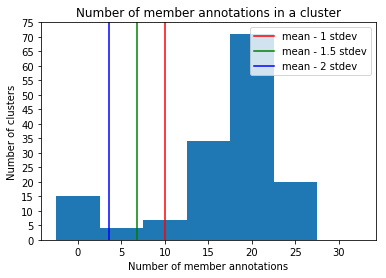

In [2]:
sa.plot_annotations_per_cluster(anno_one_snr, clustering_params)

### Cluster sizes after screening workers with high pairwise scores

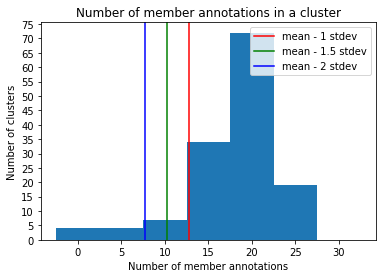

In [3]:
df_good_workers_pairwise = sa.slice_by_worker_pairwise_scores(anno_one_snr, pairwise_threshold)
sa.plot_annotations_per_cluster(df_good_workers_pairwise, clustering_params)